In [34]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv(r'C:\Users\Miguel Quecan\Desktop\arboles de decision Tarea5\Titanic-Dataset.csv')

# Mostrar las primeras filas
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# Análisis exploratorio de datos (EDA)
print("\n--- Información del dataset ---")
print(df.info())

print("\n--- Estadísticas descriptivas ---")
print(df.describe(include='all'))



--- Información del dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Estadísticas descriptivas ---
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique         

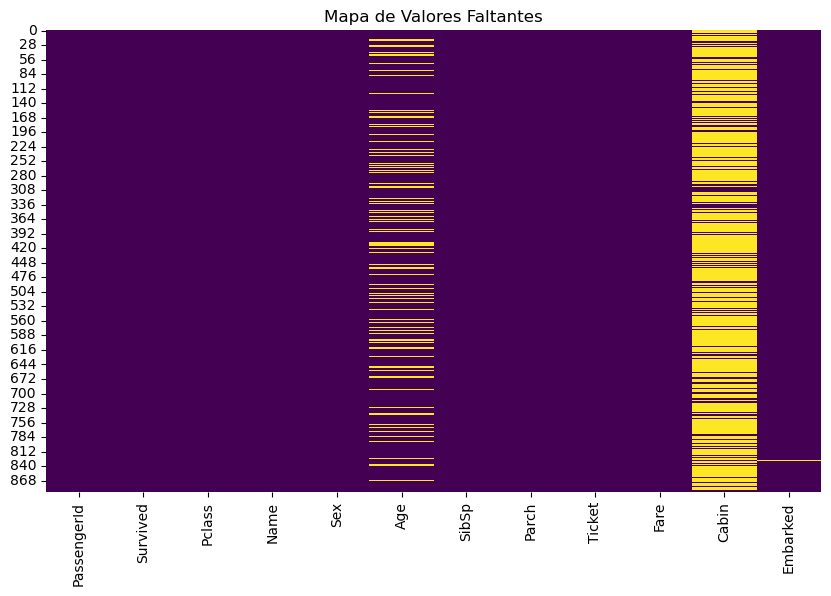

In [39]:
# Valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Valores Faltantes")
plt.show()

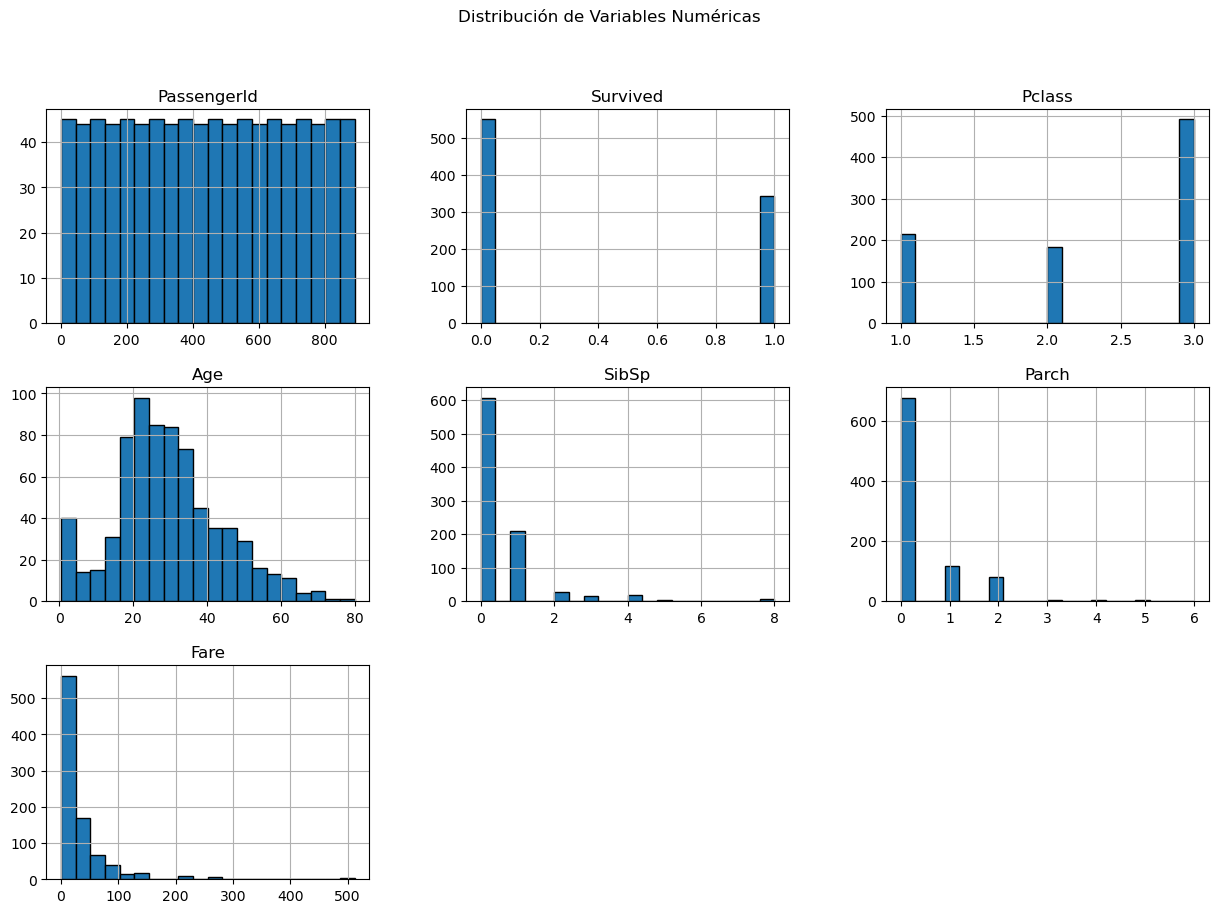

In [41]:
# Histograma
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

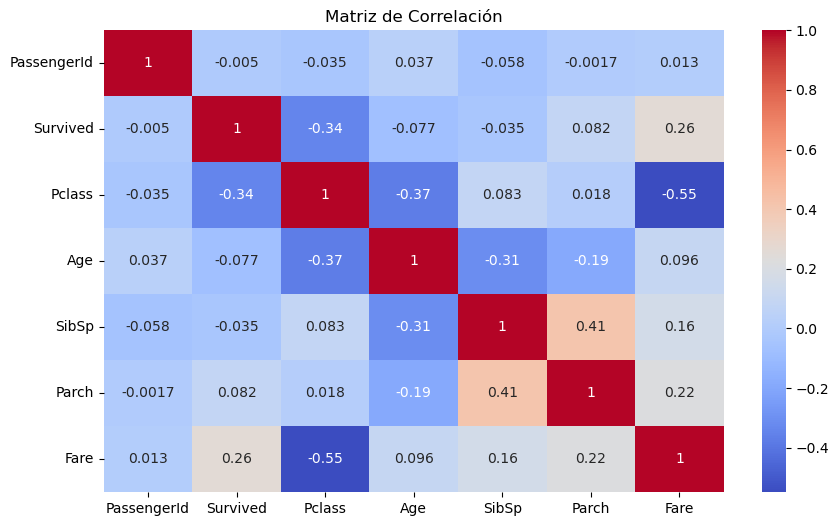

In [43]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [53]:
# Imputar valores faltantes
# Para la columna "Age" (numérica)
imputer_age = SimpleImputer(strategy='mean')
df['Age'] = imputer_age.fit_transform(df[['Age']])

# Para la columna "Embarked" (categórica)
imputer_embarked = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer_embarked.fit_transform(df[['Embarked']]).ravel()  # Usar .ravel() para convertir en serie

# Mostrar información después de imputación
print("\n--- Valores faltantes después de imputación ---")
print(df.isnull().sum())

print("\n--- Vista rápida del DataFrame actualizado ---")
print(df.head())



--- Valores faltantes después de imputación ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

--- Vista rápida del DataFrame actualizado ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male

In [55]:
# Eliminar columna "Cabin" (demasiados valores faltantes)
df.drop(columns=['Cabin'], inplace=True)

In [57]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Eliminar columnas irrelevantes
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

print("\n--- Dataset preprocesado ---")
print(df.head())


--- Dataset preprocesado ---
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [59]:
# Selección de características
X = df.drop('Survived', axis=1)
y = df['Survived']

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)


SelectKBest(k='all', score_func=<function chi2 at 0x000001FBC7A3D620>)

In [61]:
# Puntuaciones de las características
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)
print("\n--- Puntuaciones de características ---")
print(scores)



--- Puntuaciones de características ---
    Feature        Score
5      Fare  4518.319091
1       Sex    92.702447
0    Pclass    30.873699
2       Age    24.687926
4     Parch    10.097499
6  Embarked     9.755456
3     SibSp     2.581865


In [63]:
# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Tamaño de los conjuntos ---")
print(f"Train: {len(X_train)}, Test: {len(X_test)}")


--- Tamaño de los conjuntos ---
Train: 712, Test: 179


In [65]:
# Paso 5: Entrenamiento del modelo
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [67]:
# Importancia de las características
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\n--- Importancia de características ---")
print(feature_importances)


--- Importancia de características ---
    Feature  Importance
1       Sex    0.459909
0    Pclass    0.217204
2       Age    0.141012
5      Fare    0.111633
3     SibSp    0.048763
4     Parch    0.010778
6  Embarked    0.010701


In [69]:
# Evaluar el modelo
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\n--- Matriz de confusión ---")
print(conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("\n--- Reporte de clasificación ---")
print(classification_rep)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Precisión del modelo: {accuracy:.2f} ---")


--- Matriz de confusión ---
[[95 10]
 [25 49]]

--- Reporte de clasificación ---
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179


--- Precisión del modelo: 0.80 ---


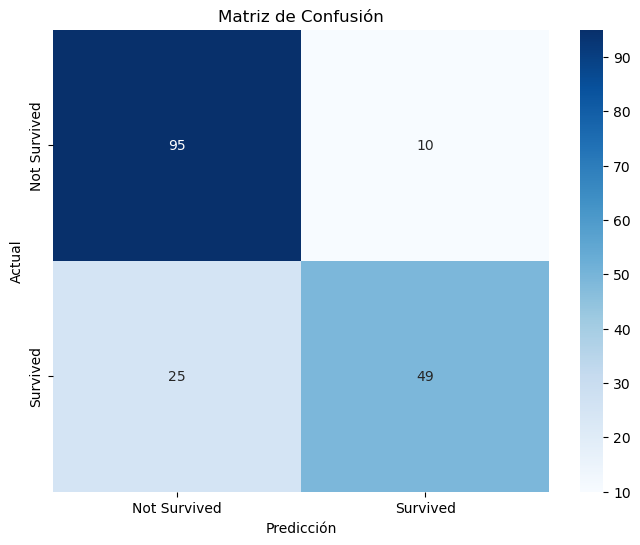

In [71]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title("Matriz de Confusión")
plt.ylabel("Actual")
plt.xlabel("Predicción")
plt.show()

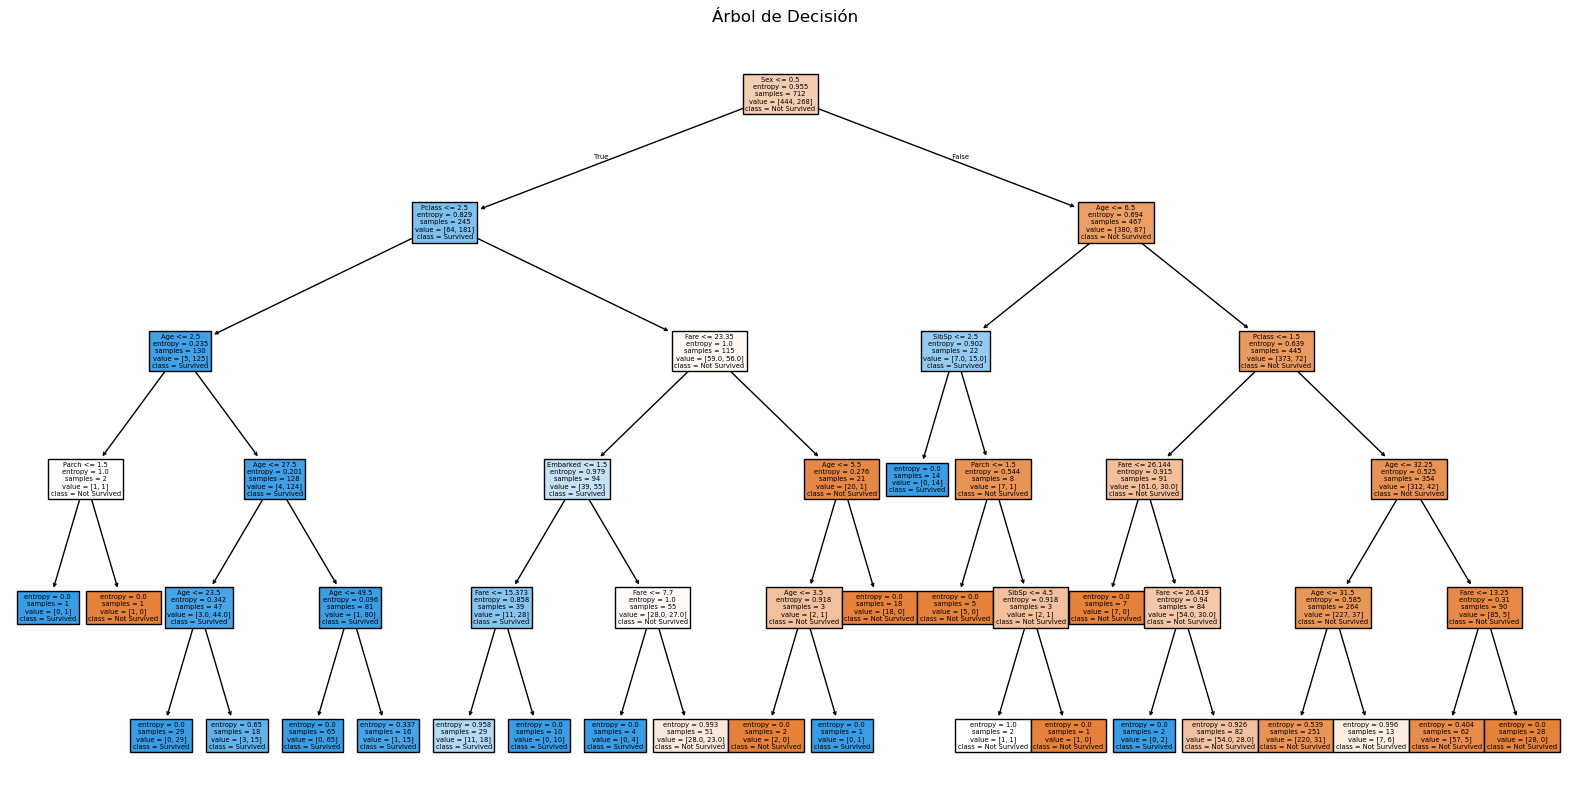

In [79]:
# Visualización del árbol de decisión
from sklearn.tree import plot_tree  # Asegurarse de importar esta función

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Árbol de Decisión")
plt.show()


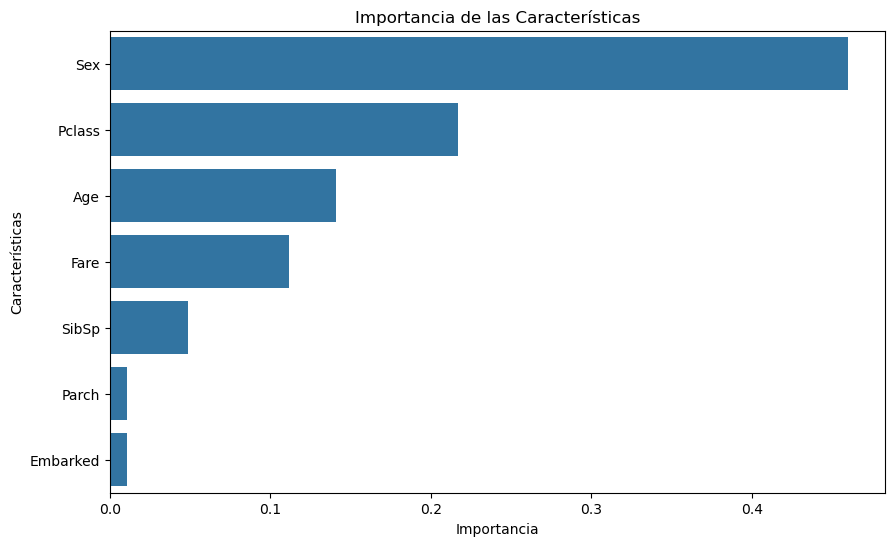

In [77]:
# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()